# Entendiendo tensorflow: un ejemplo con MNIST 

El primer ejemplo clásico de `tensorflow` consiste en entrenar una red neuronal para identificar dígitos del 0 al 9 usando la base de datos MNIST.

Si uno entra al tutorial de `tensorflow`, [la primera página](https://www.tensorflow.org/tutorials/) contiene el siguiente código:

```python
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
```

Intentemos explicarla parte por parte.

Comenzamos importando `tensorflow` y descargando la base de datos `mnist`

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

Separamos la información en datos de entrenamiento y datos de test, y los normalizamos.

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

¿Qué son `x_train` y `y_train`?, veamos

In [3]:
print(type(x_train))

<class 'numpy.ndarray'>


In [4]:
x_train.ndim

3

¡ajá!, `x_train` es un `np.array` de dimensión 3.

In [5]:
x_train.shape

(60000, 28, 28)

podemos entender a `x_train` como una colección de 60000 imágenes de tamaño `(28, 28)`. Veamos qué tiene `y_train`.

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
y_train.shape

(60000,)

`y_train` es un vector con `60000` con las etiquetas respectivas de las imágenes en `x_train`. Imprimamos un par usando `matshow`, una función de `matplotlib`.

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def print_a_random_number():
    i = np.random.randint(0, 60000, 1)[0]
    plt.figure()
    plt.imshow(x_train[i,:,:])
    plt.title('Number: {}'.format(y_train[i]))
    plt.show()

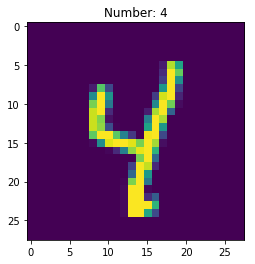

In [10]:
print_a_random_number()

Ahora pasamos a **crear** el modelo

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

En esta parte estamos estableciendo las capas internas del modelo:
- `tf.keras.models.Sequential` toma una lista de capas y crea un modelo *feed-forward*.
- `tf.keras.layers.Flatten()` simplemente convierte cada foto de una matriz `(28, 28)` a un vector de tamaño `(28*28,)`.
- `tf.keras.layers.Dense(512, activation=tf.nn.relu)` corresponde a una capa de la red neuronal completamente conectada con 512 nodos, con función de activación `relu`.
- `tf.keras.layers.Dropout(0.2)` selecciona el 20% de las entradas y las convierte a 0. 
- `tf.keras.layers.Dense(10, activation=tf.nn.softmax)` crea una última capa de la red con 10 nodos y activación softmax (i.e. estas salidas son una combinación baricéntrica, un conjunto de números que suman 1 y están entre 0 y 1). Éstas salidas modelan la probabilidad de que la entrada sea cierto dígito.

Ahora seguimos con compilar el modelo. En este paso establecemos el proceso mediante el cual encontraremos el mínimo, la función de pérdida o error, y las métricas.

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Acá casi todo se explica por sí mismo, pero vale la pena hablar de `adam`. `adam` es un [algoritmo de optimización](https://arxiv.org/pdf/1412.6980.pdf). Seguimos con ajustar el modelo en los datos de entrenamiento.

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.2008 - acc: 0.9402
Epoch 2/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.0809 - acc: 0.9756
Epoch 3/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0520 - acc: 0.9834
Epoch 4/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.0383 - acc: 0.9879
Epoch 5/5
60000/60000 [==============================] - 10s 172us/step - loss: 0.0269 - acc: 0.9912


En este punto ya tenemos el modelo entrenado. Veamos qué tan bien pasa la evaluación en el testset:

In [14]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 51us/step


[0.06549296697915998, 0.9814]

Es decir, este modelo tiene un error (`loss`) de `0.07`, y tiene una `accuracy` de `0.9798`.

Veamos un poco más en dónde se equivocó el modelo:

In [15]:
errors_i = []
for i, image in enumerate(x_test):
    prediction = np.argmax(model.predict(np.array([image]))[0])
    if y_test[i] != prediction:
        # print('y_test[i]: {}, predicción: {}, i: {}'.format(y_test[i], prediction, i))
        # plt.matshow(image)
        errors_i.append(i)

In [16]:
import random

In [17]:
def print_image_from_test_set():
    i = random.choice(errors_i)
    # print(np.array([x_test[i]]))
    prediction = np.argmax(model.predict(np.array([x_test[i]]))[0])
    print(model.predict(np.array([x_test[i]]))[0])
    plt.figure()
    plt.imshow(x_test[i,:,:])
    plt.title('Number: {}, Pred: {}'.format(y_test[i], prediction))
    plt.show()

[2.31913782e-06 1.14540336e-10 3.15786770e-06 1.04701854e-02
 1.62694214e-08 1.01627968e-03 1.76938200e-10 3.51943719e-08
 8.21323872e-01 1.67184055e-01]


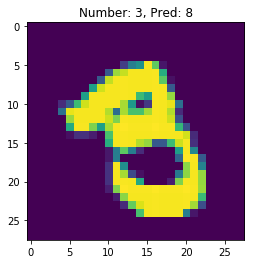

In [18]:
print_image_from_test_set()